In [23]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as pyplot

In [24]:
haberman=pd.read_csv("C:/Users/Pradip/Documents/Python Scripts/haberman.csv");
haberman.columns=["patient_age","operation_year","axillary_node_count","survival_status"]
haberman.head()
#Number of positive axillary nodes detected (numerical)
# Survival status (class attribute) 
    # 1 = the patient survived 5 years or longer 
    # 2 = the patient died within 5 year

,patient_age,operation_year,axillary_node_count,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [25]:
print("Number of data points are ",haberman.shape[0])
print("Number of features are ", haberman.shape[1])
print("Features are :", haberman.columns)

Number of data points are  305
Number of features are  4
Features are : Index(['patient_age', 'operation_year', 'axillary_node_count',
       'survival_status'],
      dtype='object')


**Observations**:
Number of data points are 305 and number of features are 4 as patient age, operation_year, axillary_node_count and survival_status

In [26]:
print("Survival status value counts: \n", haberman.survival_status.value_counts())
print(224/305*100)
print(81/305*100)

Survival status value counts: 
 1    224
2     81
Name: survival_status, dtype: int64
73.44262295081967
26.557377049180324


**Observation : Almost 73% of the patient survived beyond 5 years and almost 27% of the patients died within 5 years.** 224 number of data points found for class, patients survived beyond 5 years. 81  number of data points found for class, patients died within 5 years .
**This is imbalanced data set**

**Bivariate Analysis**

In [27]:
# print("axillary_node_count counts: \n", haberman.axillary_node_count.value_counts())
# #haberman.plot(kind="scatter", x="patient_age", y="survival_status")
#haberman.plot(kind="scatter", x="survival_status", y="axillary_node_count"); pyplot.show()
#haberman.plot(kind="scatter", x="survival_status", y="operation_year")
#haberman.plot(kind="scatter", x="operation_year", y="axillary_node_count"); pyplot.show()
#haberman.plot(kind="scatter",x="operation_year",y="patient_age"); pyplot.show()

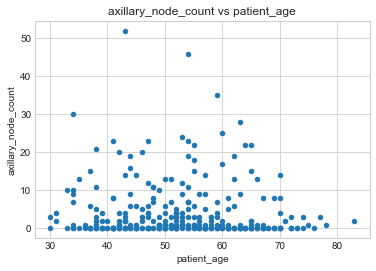

In [28]:
haberman.plot(kind="scatter",x="patient_age",y="axillary_node_count")
pyplot.title("axillary_node_count vs patient_age")
pyplot.show()

**Observation:** Most number of positive auxiliary counts detected is between 0 to 5.

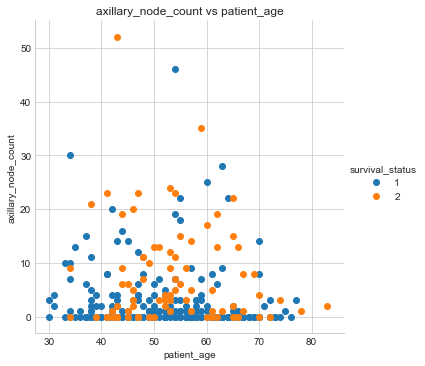

In [29]:
sb.set_style("whitegrid");
sb.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(pyplot.scatter, "patient_age", "axillary_node_count") \
   .add_legend();
pyplot.title("axillary_node_count vs patient_age")
pyplot.show();

**Observation:**
More number of positive aixiliary nodes detected and almost 90% of patients died within 5 years whose age was betweeb 40 to 70

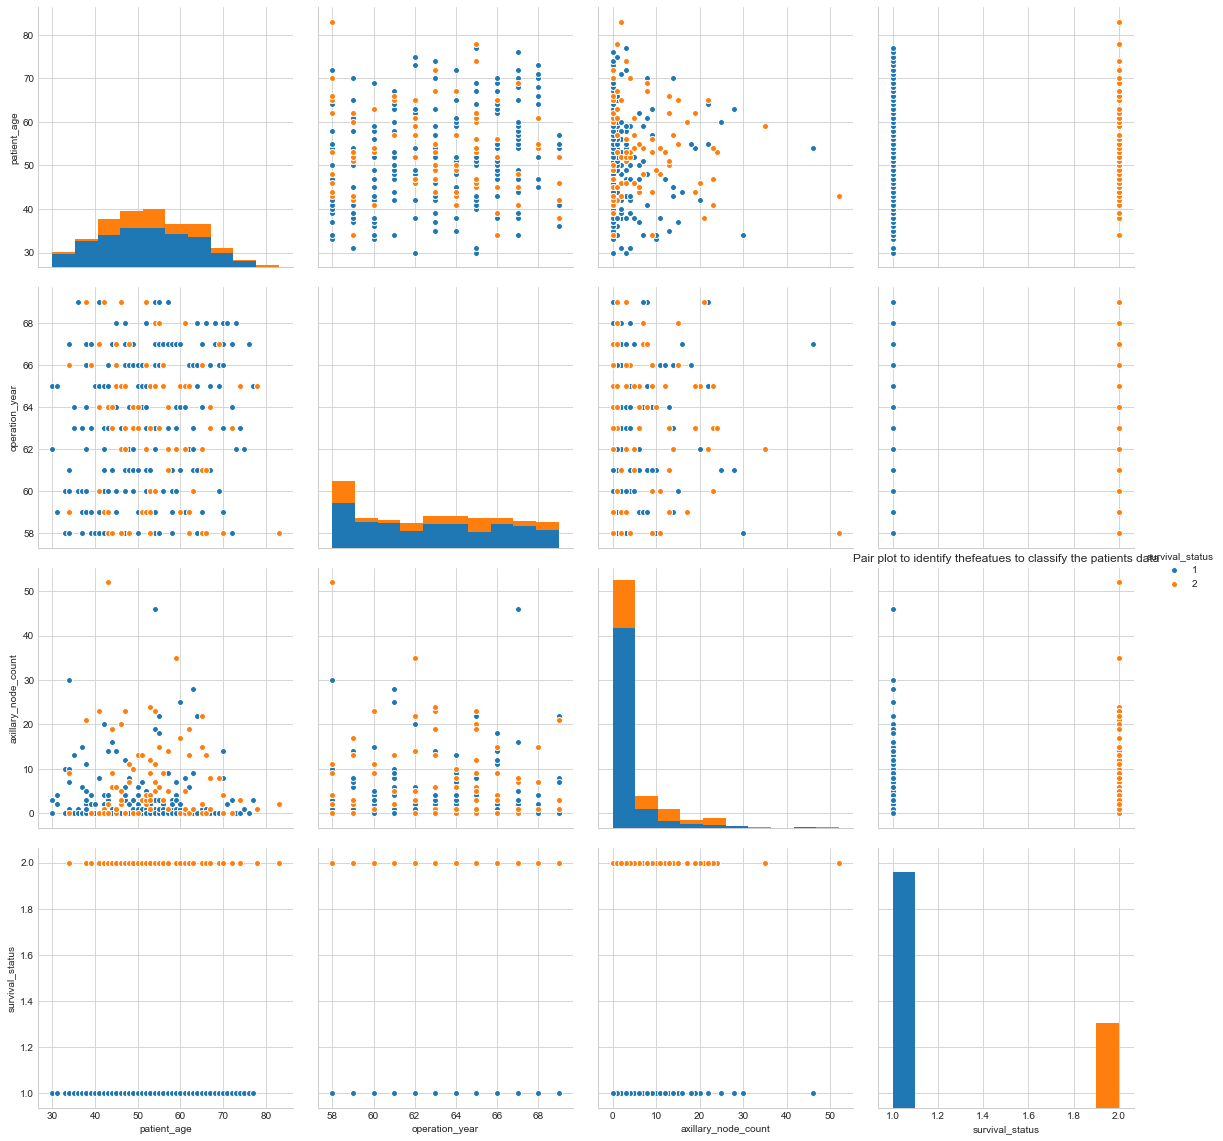

In [30]:
sb.set_style("whitegrid")
sb.pairplot(haberman,hue="survival_status", size=4)
pyplot.title("Pair plot to identify thefeatues to classify the patients data")
pyplot.show()

* **Observation:** Patients can be classified only based on survival status accurately. Also we can consider patient age and auxilliary node count featues for classification but no accurate classification can be done as per the data which we have in hand.  

**No combinations of features looks useful for classification of data.**

In [31]:
haberman_beyond_5years=haberman.loc[haberman["survival_status"]==1]
haberman_within_5years=haberman.loc[haberman["survival_status"]==2]
print("haberman_beyond_5years : Number of Data Points :",haberman_beyond_5years.shape[0]," ",haberman_beyond_5years.shape[0]/haberman.shape[0]*100, "%")
print("haberman_within_5years : Number of Data Points :",haberman_within_5years.shape[0]," ",haberman_within_5years.shape[0]/haberman.shape[0]*100, "%")

haberman_beyond_5years : Number of Data Points : 224   73.44262295081967 %
haberman_within_5years : Number of Data Points : 81   26.557377049180324 %


**Observations:**
Almost 73.5% people survived more than 5 years and almost 26.5% people survived less than 5 years.

**Univariate Analysis**

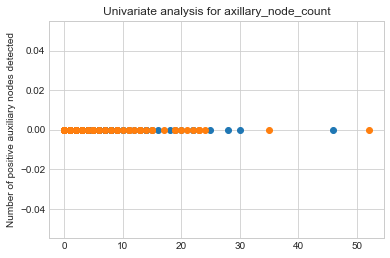

In [32]:
pyplot.close()
#pyplot.plot(haberman_beyond_5years["patient_age"], np.zeros_like(haberman_beyond_5years["patient_age"]))
#pyplot.plot(haberman_within_5years["patient_age"], np.zeros_like(haberman_within_5years["patient_age"]))
pyplot.plot(haberman_beyond_5years["axillary_node_count"], np.zeros_like(haberman_beyond_5years["axillary_node_count"]),'o')
pyplot.plot(haberman_within_5years["axillary_node_count"],np.zeros_like(haberman_within_5years["axillary_node_count"]),'o')
pyplot.title("Univariate analysis for axillary_node_count")
#pyplot.xlabel("Number of positive auxiliary nodes detected") #TypeError: 'str' object is not callable
pyplot.ylabel("Number of positive auxiliary nodes detected") #TypeError: 'str' object is not callable
pyplot.show()

**To check whether auxilliary node count feature is useful towords classification**

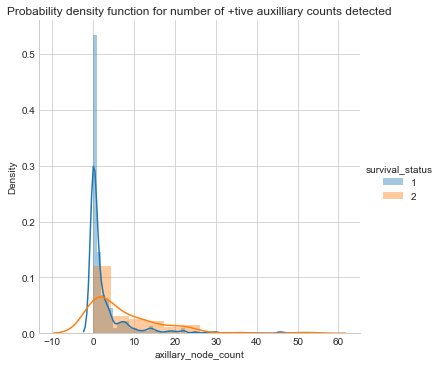

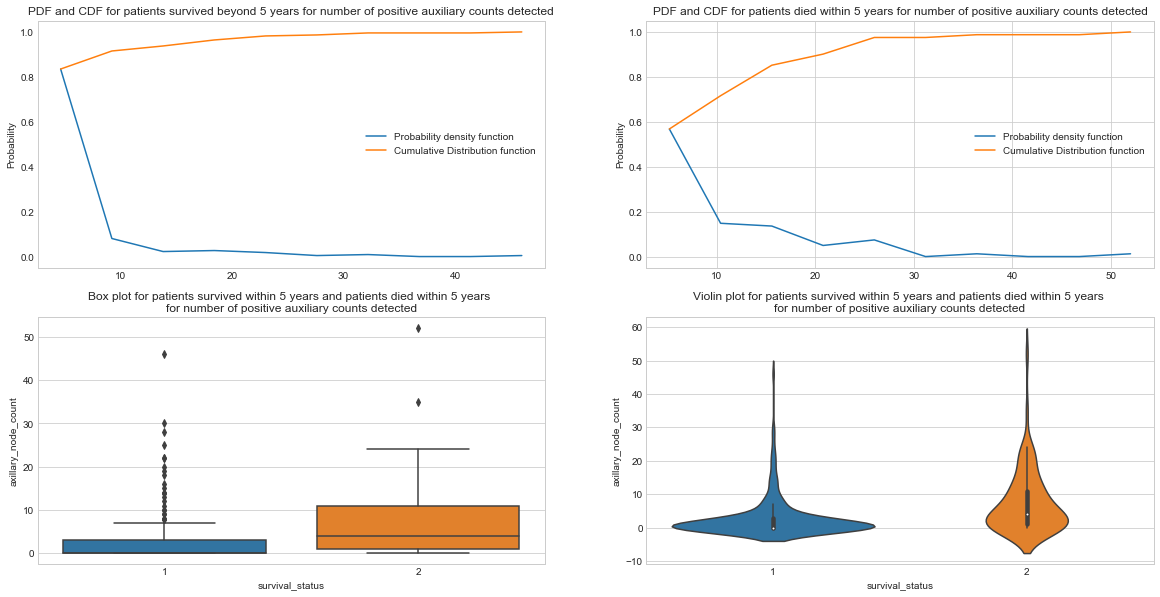

In [33]:
sb.FacetGrid(haberman, hue="survival_status", size=5) \
.map(sb.distplot,"axillary_node_count") \
.add_legend()
pyplot.ylabel("Density")
pyplot.title("Probability density function for number of +tive auxilliary counts detected")
pyplot.show()
pyplot.close()

pyplot.figure(1)
pyplot.figure(figsize=(20,10))
pyplot.subplot(221)
pyplot.grid()

counts,bin_edges=np.histogram(haberman_beyond_5years["axillary_node_count"],bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
pyplot.plot(bin_edges[1:],pdf, label="Probability density function")
pyplot.plot(bin_edges[1:],cdf, label="Cumulative Distribution function")
pyplot.ylabel('Probability')
pyplot.xlabel='Number of positive auxilliary node count'
pyplot.title('PDF and CDF for patients survived beyond 5 years for number of positive auxiliary counts detected')
pyplot.legend()
pyplot.subplot(222)

counts,bin_edges=np.histogram(haberman_within_5years["axillary_node_count"],bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
pyplot.plot(bin_edges[1:],pdf, label="Probability density function")
pyplot.plot(bin_edges[1:],cdf, label="Cumulative Distribution function")
pyplot.ylabel('Probability')
pyplot.xlabel='Number of positive auxilliary node count'
pyplot.title('PDF and CDF for patients died within 5 years for number of positive auxiliary counts detected')
pyplot.legend()

pyplot.subplot(223)
sb.boxplot(x='survival_status',y='axillary_node_count',data=haberman)
pyplot.title("Box plot for patients survived within 5 years and patients died within 5 years \nfor number of positive auxiliary counts detected")
#handles, _ = ax.get_legend_handles_labels()
#ax.legend(handles)
#legend = ["UV Weak", "UV Upturn"]
#pyplot.legend()
pyplot.subplot(224)
sb.violinplot(x='survival_status',y='axillary_node_count',data=haberman)
pyplot.title("Violin plot for patients survived within 5 years and patients died within 5 years \nfor number of positive auxiliary counts detected")
pyplot.show()

**Data set cannot be well seperated based on positive auxilliry node counts detected.**

**Observations for patients survived beyond 5 years: ** Almost 82% of positive auxilliry node counts detected are between 0 to 5 and almost 1% of the positive auxilliry node counts detected are between 14 to 25; and almost 0.1% of the positive auxilliry node counts detected are between 26 to 45. Also, 99% of the positive auxilliry node counts detected are below 25 and 1% of the positive auxilliry node counts detected are above 25 till 46 

**Observations for patients died within 5 years:** Almost 99% of positive auxilliry node counts detected are below 25

**To check whether operation year feature is useful towords classification**

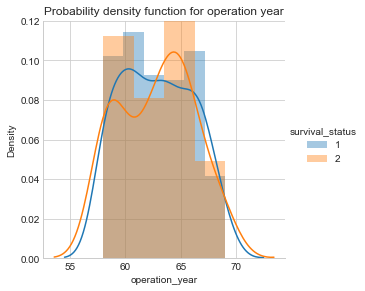

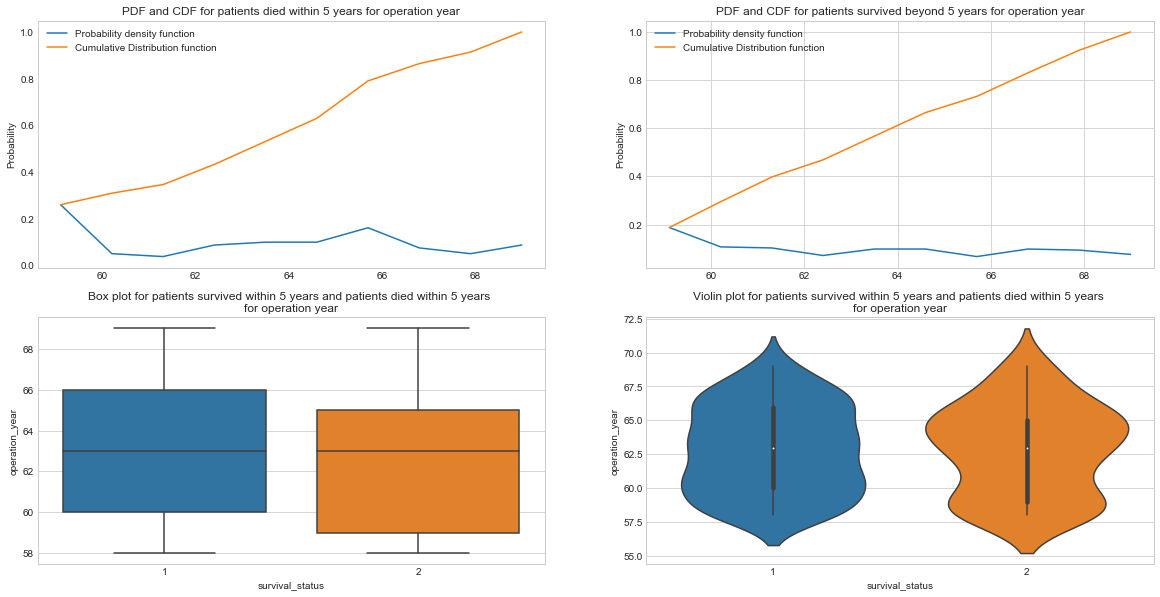

In [34]:
sb.FacetGrid(haberman, hue="survival_status", size=4) \
.map(sb.distplot,"operation_year") \
.add_legend()
pyplot.ylabel("Density")
pyplot.title("Probability density function for operation year")
pyplot.show()

pyplot.figure(2)
pyplot.figure(figsize=(20,10))
pyplot.subplot(221)
pyplot.grid()

counts,bin_edges=np.histogram(haberman_within_5years["operation_year"],bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
pyplot.plot(bin_edges[1:],pdf, label="Probability density function")
pyplot.plot(bin_edges[1:],cdf, label="Cumulative Distribution function")
pyplot.ylabel('Probability')
pyplot.xlabel='Operation year'
pyplot.title('PDF and CDF for patients died within 5 years for operation year')
pyplot.legend()
pyplot.subplot(222)

counts,bin_edges=np.histogram(haberman_beyond_5years["operation_year"],bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
pyplot.plot(bin_edges[1:],pdf, label="Probability density function")
pyplot.plot(bin_edges[1:],cdf, label="Cumulative Distribution function")
pyplot.ylabel('Probability')
pyplot.xlabel='Operation year'
pyplot.title('PDF and CDF for patients survived beyond 5 years for operation year')
pyplot.legend()

pyplot.subplot(223)
sb.boxplot(x='survival_status',y='operation_year',data=haberman)
pyplot.title("Box plot for patients survived within 5 years and patients died within 5 years \nfor operation year")

pyplot.subplot(224)
sb.violinplot(x='survival_status',y='operation_year',data=haberman)
pyplot.title("Violin plot for patients survived within 5 years and patients died within 5 years \nfor operation year")
pyplot.show()

pyplot.show()

**Data set cannot be well seperated based on operation year.**

**Observations for patients died within 5 years :** Operation year 58 has 28% of patients which is the highest percentage of patients across rest of the operation years. Opearation year 66 has almost 18% of patients which is the second highest percentage of patients across rest of the operation years.

**Observations for patients survived beyond 5 years :** Operation year 58 has 20% of patients which is the highest percentage of patients across rest of the operation years.

**To check whether patient age feature is useful towords classification**

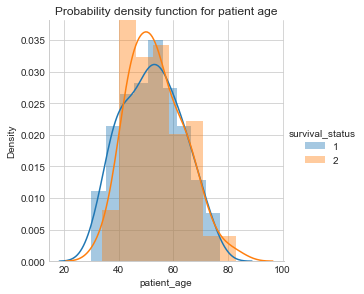

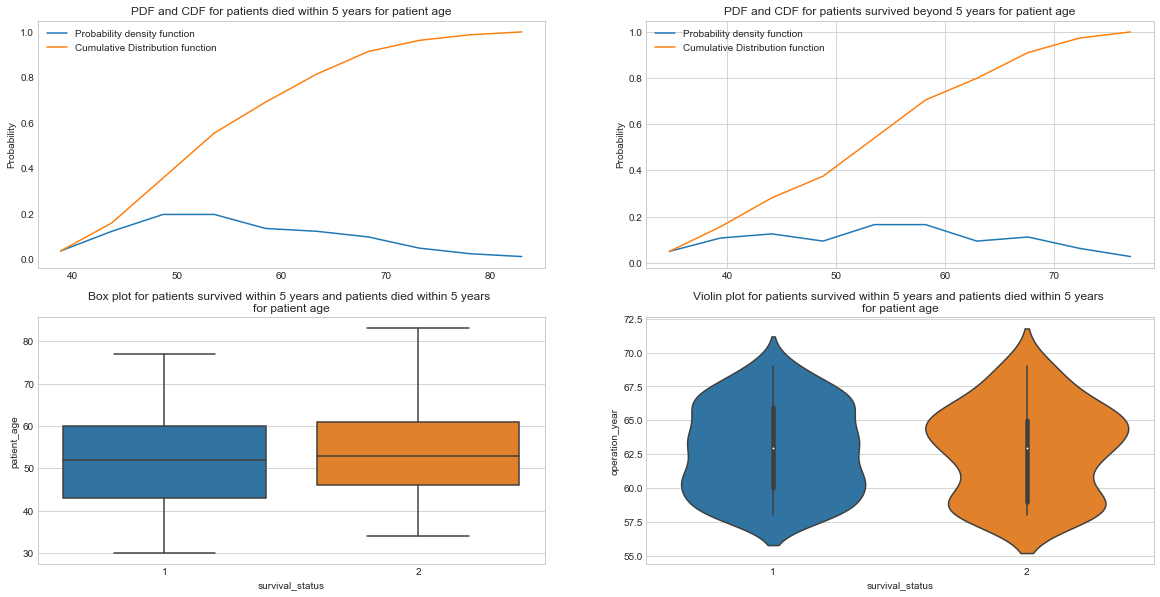

In [35]:
sb.FacetGrid(haberman, hue="survival_status", size=4) \
.map(sb.distplot,"patient_age") \
.add_legend()
pyplot.ylabel("Density")
pyplot.title("Probability density function for patient age")
pyplot.show()

pyplot.figure(5)
pyplot.figure(figsize=(20,10))
pyplot.subplot(221)
pyplot.grid()

counts,bin_edges=np.histogram(haberman_within_5years["patient_age"],bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
pyplot.plot(bin_edges[1:],pdf, label="Probability density function")
pyplot.plot(bin_edges[1:],cdf, label="Cumulative Distribution function")
pyplot.ylabel('Probability')
pyplot.xlabel='Patient age'
pyplot.title('PDF and CDF for patients died within 5 years for patient age')
pyplot.legend()
pyplot.subplot(222)

counts,bin_edges=np.histogram(haberman_beyond_5years["patient_age"],bins=10, density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
pyplot.plot(bin_edges[1:],pdf, label="Probability density function")
pyplot.plot(bin_edges[1:],cdf, label="Cumulative Distribution function")
pyplot.ylabel('Probability')
pyplot.xlabel='Patient age'
pyplot.title('PDF and CDF for patients survived beyond 5 years for patient age')
pyplot.legend()

pyplot.subplot(223)
sb.boxplot(x='survival_status',y='patient_age',data=haberman)
pyplot.title("Box plot for patients survived within 5 years and patients died within 5 years \nfor patient age")

pyplot.subplot(224)
sb.violinplot(x='survival_status',y='operation_year',data=haberman)
pyplot.title("Violin plot for patients survived within 5 years and patients died within 5 years \nfor patient age")
pyplot.show()

**Data set cannot be well seperated based onpatient age.**

**Some more observations:**

In [36]:
print("Mean : ",np.mean(haberman["axillary_node_count"]))
print("Median : ",np.median(haberman["axillary_node_count"]))
print("Percentiles: in sequence \n    0%,25%, 50%, 60%, 66%, 70%, 75%, 80%, 90%, 100%\n", \
      np.percentile(haberman["axillary_node_count"],[0,25,50,60,66,70,75,80,90, 100]))

Mean :  4.036065573770492
Median :  1.0
Percentiles: in sequence 
    0%,25%, 50%, 60%, 66%, 70%, 75%, 80%, 90%, 100%
 [ 0.  0.  1.  2.  3.  3.  4.  7. 13. 52.]


**Observation : **Across the patients, 50% of positive auxilliry node counts detected are below 1

In [37]:
print("Mean : ",np.mean(haberman_beyond_5years["axillary_node_count"]))
print("Median : ",np.median(haberman_beyond_5years["axillary_node_count"]))
print("Percentiles: in sequence \n    0%,25%, 50%, 60%, 66%, 70%, 75%, 80%, 90%, 100%\n", \
      np.percentile(haberman_beyond_5years["axillary_node_count"],[0,25,50,60,66,70,75,80,90, 100]))

Mean :  2.799107142857143
Median :  0.0
Percentiles: in sequence 
    0%,25%, 50%, 60%, 66%, 70%, 75%, 80%, 90%, 100%
 [ 0.  0.  0.  1.  1.  2.  3.  4.  8. 46.]


**Observation:**
For patients survuved beyond 5 years, 66% of positive auxilliry node counts detected are below 1 and 90% of the positive auxilliry node counts detected are below 8. 50% of positive auxilliry node counts detected are  0

In [38]:
print("Mean : ",np.mean(haberman_within_5years["axillary_node_count"]))
print("Median : ",np.median(haberman_within_5years["axillary_node_count"]))
print("Percentiles: in sequence \n    0%, 25%,   50%,   60%,  66%,  70%, 75%, 80%, 90%, 100%\n", \
      np.percentile(haberman_within_5years["axillary_node_count"],[0,25,50,60,66,70,75,80,90, 100]))

Mean :  7.45679012345679
Median :  4.0
Percentiles: in sequence 
    0%, 25%,   50%,   60%,  66%,  70%, 75%, 80%, 90%, 100%
 [ 0.   1.   4.   6.   8.8  9.  11.  13.  20.  52. ]


**Observation:**
For patients died within 5 years, 80% of positive auxilliry node counts detected are below 13 and 90% of the positive auxilliry node counts detected are below 20

**Final conclusion:**


Number of data points are 305 and number of features are 4 as patient age, operation_year, axillary_node_count and survival_status
> **Almost 73% of the patient survived beyond 5 years and almost 27% of the patients died within 5 years.  **224 number of data points found for class, patients survived beyond 5 years. 81  number of data points found for class, patients died within 5 years .
**This is imbalanced data set**

**Objective : **Our main objective is to find out featues and conbibation of features which are useful towords classification 

Survival satus is only the feature useful towords classification

No combination of feature found towards classification of data

Quantifiable other observations are provided above below the plotted graphs.